# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle as pkl

# 1) Logistic regresssion model

### summary
- logistic regression is the simplest model for classification yet produces the best results compared to other models I have tried.
this is because of data is evenly distributed and the features are independent of each other.

In [3]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# load data
df = pd.read_csv('data/selected_features.csv')

# split data
Y = df['price_range']
X = df.drop(columns=['price_range'])
# X = df[['ram']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [4]:
# build model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

#predict
Y_pred = logistic_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       102
           1       0.94      0.95      0.94        93
           2       0.93      0.90      0.92        92
           3       0.96      0.95      0.95       112

    accuracy                           0.95       399
   macro avg       0.95      0.95      0.95       399
weighted avg       0.95      0.95      0.95       399



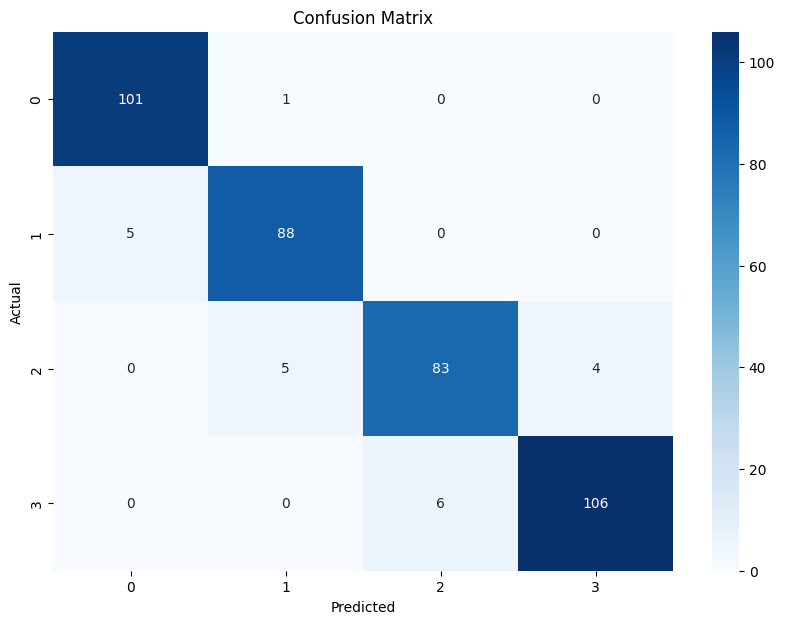

In [5]:
#another evaluation
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2) Random Forest model

### summary
- Random Forest model is a good model for classification since it a collection of decision trees that can create some rules to classify the price range prediction of the mobile phone.
- it produced good results relatively close to logistic regression model.

In [6]:
# random forest
from sklearn.ensemble import RandomForestClassifier

# build model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)

#predict
Y_pred = random_forest_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.88      0.90      0.89        93
           2       0.88      0.91      0.90        92
           3       0.98      0.95      0.96       112

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399



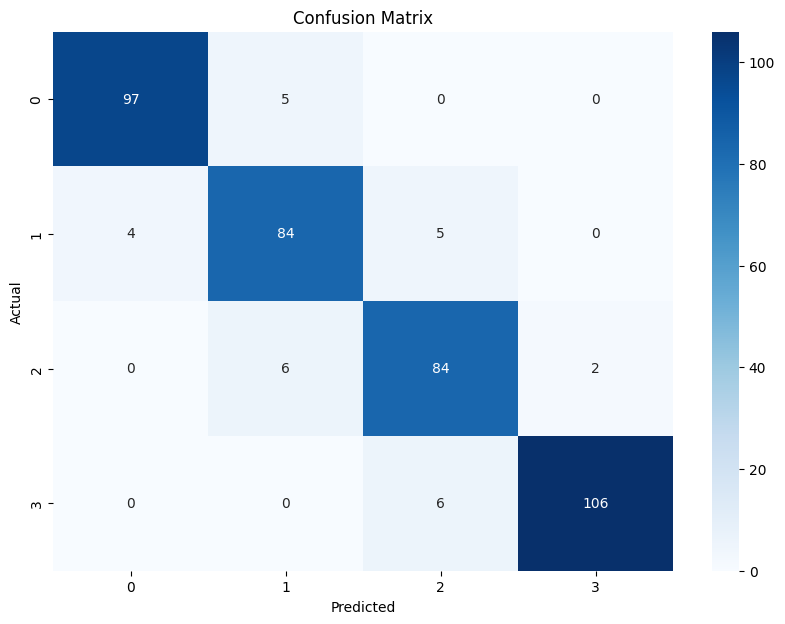

In [7]:
#another evaluation
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 3) Gradient Boosting model

### summary
- Gradient Boosting model is a good model for classification since it a collection of decision trees connected sequentially to improve the prediction of the mobile phone price range.
- it produced good results relatively close to logistic regression model. but it is the slowest model to train and predict, due to its sequential nature.
- it scored low accuracy compared to the other models for 1 and 2 price ranges.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# build model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, Y_train)

#predict
Y_pred = gradient_boosting_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       102
           1       0.87      0.91      0.89        93
           2       0.89      0.90      0.90        92
           3       0.99      0.95      0.97       112

    accuracy                           0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399



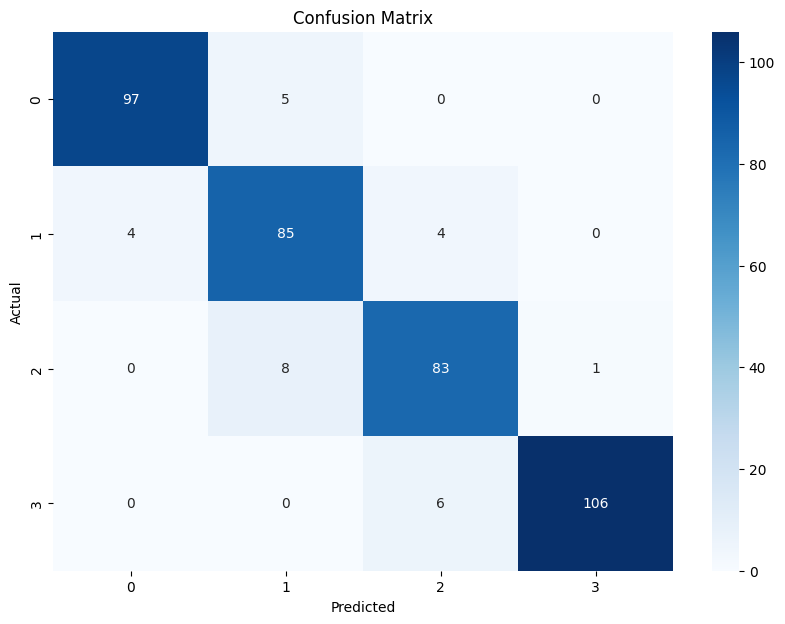

In [9]:
#another evaluation
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4) SVM model

### summary
- svm model is a good model for classification, it is very close to logistic regression model in terms of accuracy.

In [11]:
from sklearn.svm import SVC

# build model
svc_model = SVC()
svc_model.fit(X_train, Y_train)

#predict
Y_pred = svc_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       102
           1       0.91      0.96      0.93        93
           2       0.91      0.91      0.91        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399



# 5) KNN model

### summary
- KNN model works great with small number of features, but it doesnt produce good results like other models in fact it showed the worst results compared to other models.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# build model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

#predict
Y_pred = knn_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       102
           1       0.86      0.89      0.88        93
           2       0.84      0.87      0.86        92
           3       0.95      0.88      0.91       112

    accuracy                           0.89       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.90      0.89      0.90       399



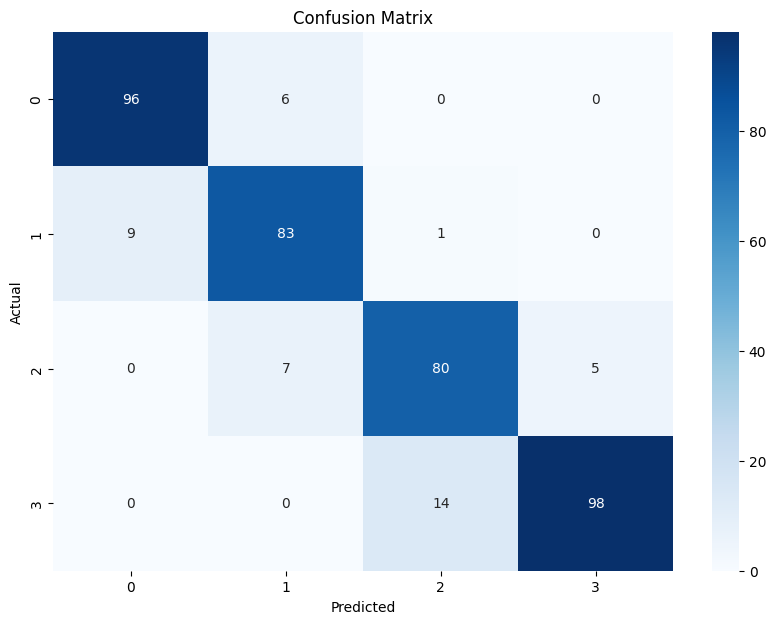

In [13]:
#another evaluation
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## the best 2 models were Logistic regression and SVM. 
now I will use the test csv file to predict the price range of the mobile phones using the logistic regression model and SVM model.

In [14]:
# Load test data
x_test = pd.read_csv('data/test.csv')

# Drop the 'id' column
x_test = x_test.drop(columns=['id'])

# Scale the data
scaler = pkl.load(open('data/scaler.pkl', 'rb'))
x_test_scaled = scaler.transform(x_test)

# Convert the scaled data back to a DataFrame
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Select the required features
x_test_scaled = x_test_scaled[['ram', 'battery_power', 'px_width','px_height']]

# Predict
y_pred = logistic_model.predict(x_test_scaled)

In [67]:
y_pred = pd.DataFrame(y_pred, columns=['price_range'])
y_pred.to_csv('data/logistic_predictions.csv', index=False)

In [68]:
# svm
y_pred = svc_model.predict(x_test_scaled)
y_pred = pd.DataFrame(y_pred, columns=['price_range'])
y_pred.to_csv('data/svm_predictions.csv', index=False)


# testing only logistic regression model with the best feature (ram)

### summary
- here the logistic regression model is tested with the best feature (ram) and the accuracy drops greatly because the feature is not enough to predict the price range of the mobile phone.

In [15]:
#save models
pkl.dump(logistic_model, open('data/logistic_model.pkl', 'wb'))
pkl.dump(svc_model, open('data/svm_model.pkl', 'wb'))

In [42]:

# load data
df = pd.read_csv('data/selected_features.csv')

# split data
Y = df['price_range']
X = df[['ram']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# build model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

#predict
Y_pred = logistic_model.predict(X_test)

#evaluation
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       102
           1       0.72      0.62      0.67        93
           2       0.70      0.74      0.72        92
           3       0.91      0.89      0.90       112

    accuracy                           0.80       399
   macro avg       0.79      0.79      0.79       399
weighted avg       0.80      0.80      0.80       399



# conclusion

- logistic regression model is the best model for this dataset since the data is evenly distributed and the features are independent of each other.